# DAT210x - Programming with Python for DS

## Module6- Lab4

In this lab, you'll get started with decision trees by revisiting UCI's wheat-seeds dataset, so you can benchmark how long it takes to train and predict with decision trees relative to the speed of KNeighbors and SVC, as well as compare the decision boundary plots produced by it.

No starter code this time. Instead, take your completed Module6/Module6 - Lab1.ipynb and modify it by adding in a Decision Tree Classifier, setting its max_depth to 9, and random_state=2, but not altering any other setting.
Make sure you add in the benchmark and drawPlots call for our new classifier as well.
Answer the questions below.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import time

import warnings
warnings.filterwarnings('ignore')

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [2]:
C = 1
kernel = 'linear'

In [3]:
# TODO: Change to 200000 once you get to Question#2
iterations = 5000
# iterations = 200000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = True

### Convenience Functions

In [4]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure(figsize=(15,10))
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [5]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        model.fit(X_train, y_train)
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = model.score(X_test, y_test)
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [6]:
# .. your code here ..
X = pd.read_csv(r'Datasets/wheat.data', index_col=0)
# print(len(X))
print(len(X.drop_duplicates())) #210
X.head(3)

210


,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama


In [7]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any row with a nan:

In [8]:
X = X.dropna(axis=0)
print(len(X))

203


In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [9]:
y = X['wheat_type']
X = X.drop(columns=['wheat_type'])

In [10]:
y = y.map({'canadian':0, 'kama':1, 'rosa':2})

Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Create an Decision Tree classifier named `tree` and set max_depth to 9, and random_state to 2

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=9, random_state=2)

In [18]:
for i in range(5, 0, -1):
    tree = DecisionTreeClassifier(max_depth=i, random_state=2)
    print('*********** {} ************'.format(i))
    benchmark(tree, X_train, X_test, y_train, y_test, 'Decision Tree')
    

*********** 5 ************
Decision Tree Results
5000 Iterations Training Time:  2.6599178314208984
5000 Iterations Scoring Time:  1.0192725658416748
High-Dimensionality Score:  91.803
*********** 4 ************
Decision Tree Results
5000 Iterations Training Time:  2.5222206115722656
5000 Iterations Scoring Time:  1.0252552032470703
High-Dimensionality Score:  88.525
*********** 3 ************
Decision Tree Results
5000 Iterations Training Time:  2.385620355606079
5000 Iterations Scoring Time:  1.0003230571746826
High-Dimensionality Score:  88.525
*********** 2 ************
Decision Tree Results
5000 Iterations Training Time:  2.355699300765991
5000 Iterations Scoring Time:  1.0153157711029053
High-Dimensionality Score:  85.246
*********** 1 ************
Decision Tree Results
5000 Iterations Training Time:  1.7553024291992188
5000 Iterations Scoring Time:  1.1878225803375244
High-Dimensionality Score:  68.852


Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

### Fire it Up:

Decision Tree Results
5000 Iterations Training Time:  2.5940585136413574
5000 Iterations Scoring Time:  1.0372254848480225
High-Dimensionality Score:  91.803
Max 2D Score:  90.164


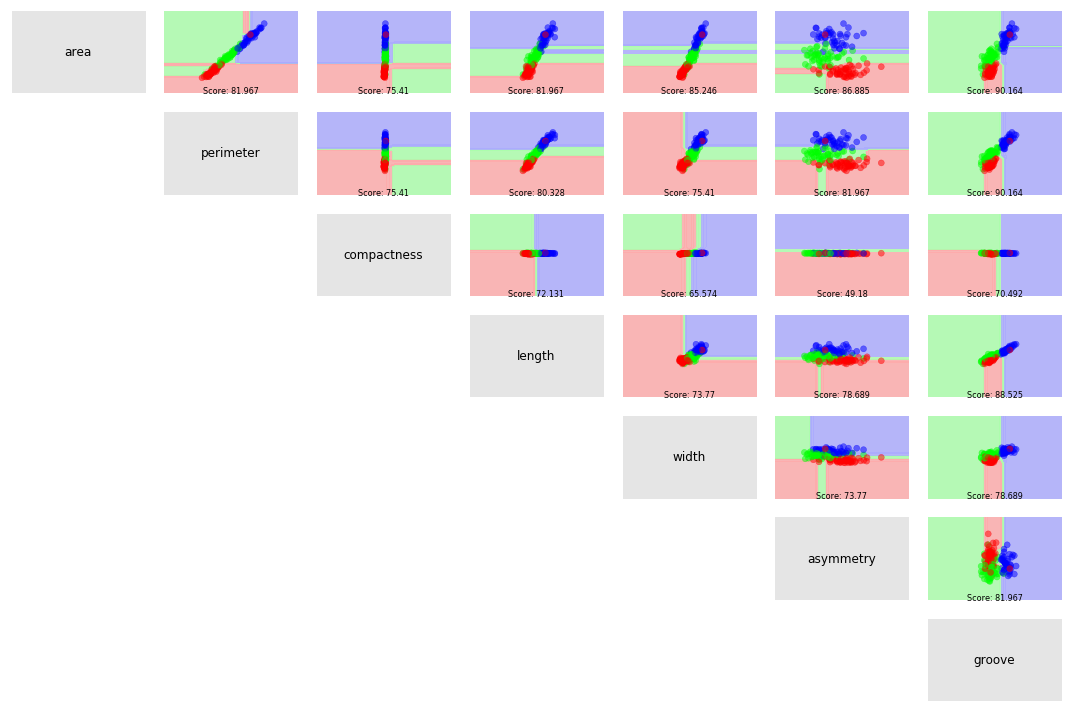

In [13]:
benchmark(tree, X_train, X_test, y_train, y_test, 'Decision Tree')
drawPlots(tree, X_train, X_test, y_train, y_test, 'Decision Tree')

In [14]:
plt.show()